In [ ]:
"""
Python for Finance: Mastering data driven finance.
Chapter 12 - Stochastics

This chapter introduces 

"Random Numbers"
Pseudo-random numbers build basis for all simulation efforts.

"Simulation"
In finance two simulation taks are of importance: simulation of random variables and stochastic prosesses.

"Valuation"
Two main disiplines when it comes to valuation are valuation with Euro exercise and US exercise
also Bermudan exercise(a finite set of spefific dates)

"Risk Measuers"
Simulation lends well to the calculation of risk like[value at risk, credit value-at-risk and credit valuation adjustments]
"""


In [4]:
import math 
import numpy as np 
import numpy.random as npr
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline


# Random Numbers 


npr.seed(100)
np.set_printoptions(precision=4)

In [5]:
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [6]:
npr.rand(10, 5)

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365],
       [0.8904, 0.9809, 0.0599, 0.8905, 0.5769],
       [0.7425, 0.6302, 0.5818, 0.0204, 0.21  ],
       [0.5447, 0.7691, 0.2507, 0.2859, 0.8524],
       [0.975 , 0.8849, 0.3595, 0.5989, 0.3548],
       [0.3402, 0.1781, 0.2377, 0.0449, 0.5054]])

In [7]:
a = 5
b = 10

npr.rand(10) * (b - a) + a

array([6.8813, 7.964 , 8.1497, 5.713 , 9.6692, 9.7319, 8.0115, 6.9388,
       6.8159, 6.0217])

In [9]:
npr.rand(4, 4) * (b - a) + a

array([[5.5677, 5.6651, 7.2802, 5.7987],
       [9.8082, 9.1881, 7.6008, 6.0914],
       [5.6746, 9.8954, 8.5352, 9.2999],
       [6.9359, 6.2542, 6.4972, 9.2845]])

Text(0.5, 1.0, 'Poisson')

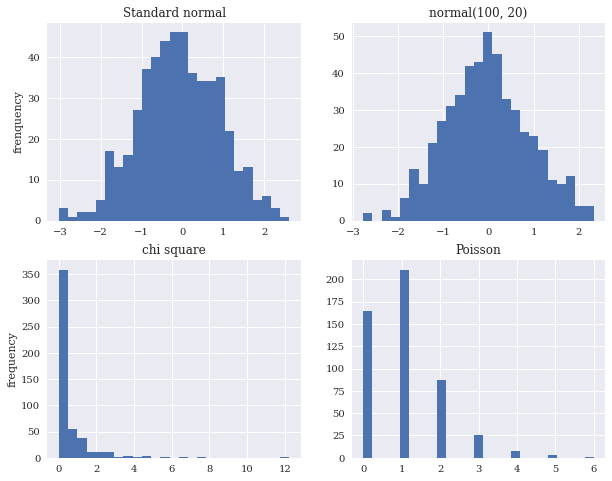

In [12]:
"""
Next plot visualizes random draws from the following distribution.

* Standard normal with mean of 0 and std of 1.
* Normal with mean of 100 and std of 20.
* Chi square with 0.5 degress of freedom.
* Poisson with lambda of 1.

The result is 3 continuos distributions and the discrete one (Poisson)
Poisson is used to simulate the arrival of (rare) extrenal events.
Like a jump or drop of an instrument or exogenic shock
"""
sample_size = 500

rn1 = npr.standard_normal(sample_size) # Standard normally distributed random numbers
rn2 = npr.standard_normal(sample_size) # Nprmally distributed random numbers
rn3 = npr.chisquare(df=0.5, size=sample_size) # Chi-square distributed random numbers
rn4 = npr.poisson(lam=1.0, size=sample_size) # Poisson distributed numbers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                              figsize=(10,8))

ax1.hist(rn1, bins=25)
ax1.set_title('Standard normal')
ax1.set_ylabel('frenquency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')




In [ ]:
"""
#Simulation

Monte Carlo simulation (MCS) is one of the most important numerical techniques in fianace.
It is flaexible numerical method when it comes to the evalutaion of math expressions.
The valuation of financial derivatives. 
Hundreds of thousands even millions of computaions have to be carried out to come up with a single value estimate.
"""

In [21]:
"""
# Random Variables 
The Black-Scholes-Merton setup for option pricing.

The variables and parameters have the following meaning:

ST = Index leel at date T
r = Constant riskless short rate
o = Constant volatility(= std of returns) of S
z = Standard normally distributed variable
"""

S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000 
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
                 sigma * math.sqrt(T) * npr.standard_normal(I))
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                        sigma * math.sqrt(T), size=I)

Text(0, 0.5, 'frequency')

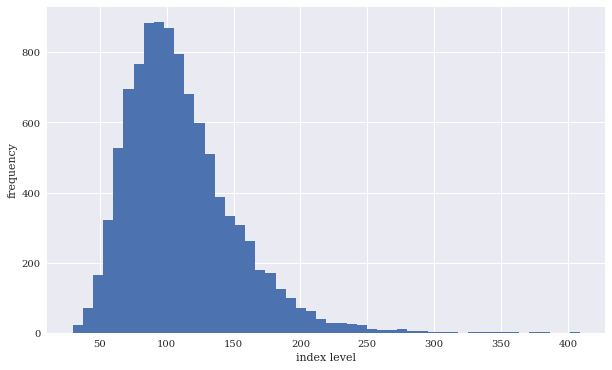

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [25]:
"""
A statistical mements of the sulting distributions.
The scipy.stats subpackage and helper function prove useful
"""
import scipy.stats as scs

def print_stats(a1, a2):
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' %
    ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))


    
    
    
print_stats(ST1,ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         29.665         27.105
           max        409.110        427.652
          mean        110.578        110.225
           std         40.408         39.764
          skew          1.187          1.091
      kurtosis          2.664          2.218


Text(0, 0.5, 'frequency')

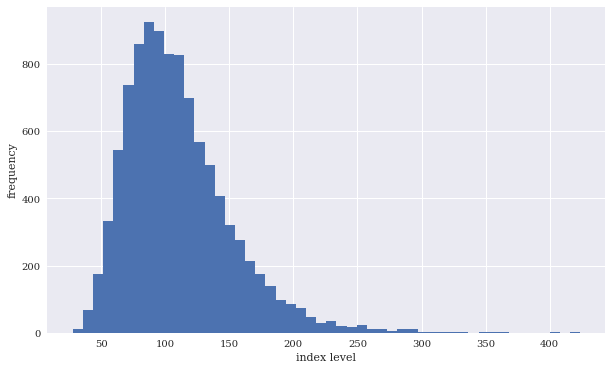

In [28]:
"""
# Stochastic Prosesses 
A stochastic process is a sequence of random variables. in that sense,
one should expect something similar to a sequence of repeated simulations of a random variable when simulating the process.
Draws are typically not independent but rather depend on the results of previos draws.

Stochastic process used in fiance exhibit the Markov property which maily says
(tomorrow's value of the process only depends on todays state of the process not any more.
The process then is also called memoryless

Geometric Brownian motion

The values for the index level are log-normally distributed.
"""
I = 10000 # The number of path to be simulated 
M = 50 # The number of time intervals for the discretizatiom 
dt = T / M # The length of time interval in year fractions
S = np.zeros((M + 1, I)) # The two-simansional adarray object for the index levels
S[0] = S0 # The intial values for the initial point in time t= 0 
for t in range (1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                            sigma * math.sqrt(dt) * npr.standard_normal(I)) # The simulation via semivectorized expression
    # The loop is over the point in the staring at t=1 and ending at t = T

    
    
plt.figure(figsize=(10,6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [30]:
print_stats(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.859         27.105
           max        423.629        427.652
          mean        110.123        110.225
           std         40.827         39.764
          skew          1.234          1.091
      kurtosis          2.851          2.218


Text(0, 0.5, 'index level')

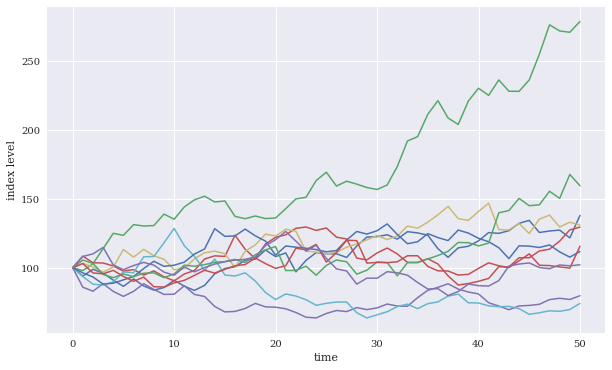

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

"""
Using the dynamic simulatied approach not only allows us to visualize paths as displayed in plot.
Alos to value options with USA/Nermudad exercise or options whore payoff is path-dependent.



"""

In [44]:
"""
Square-root-diffusion 
'Mean-Reverting-Processes' are used to model short rates or volatility processes.

The square-root disffusion has the convenient and realistic characteristic that the values of Xt remain strictly +.
Whe discretzing it by an Euler scheme, negative values cannot be excluded.
The reason why one works with + version of original simulated process. 
In the simulation code, one therefore needs two ndarray objects instead of only one.
"""

x0 = 0.05 # The initial value 
kappa = 3.0  # The mean reversion factor 
theta = 0.02 # The long-term mean value
sigma = 0.1 # The volatility factor
I = 10000 # 
M = 50 
dt = T / M 

def srd_euler():
    xh = np.zeros((M + 1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1,M +1):
        xh[t] = (xh[t - 1] +
                kappa + (theta - np.maximum(xh[t - 1], 0)) * dt +\
                 sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * math.sqrt(dt)\
                 * npr.standard_normal(I)) # The simulation based on an Euler scheme
    x = np.maximum(xh, 0 )
    return x 
x1 = srd_euler()
        

Text(0, 0.5, 'frequency')

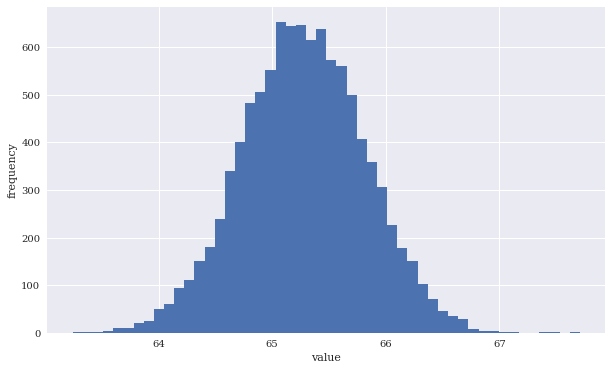

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

Text(0, 0.5, 'index level')

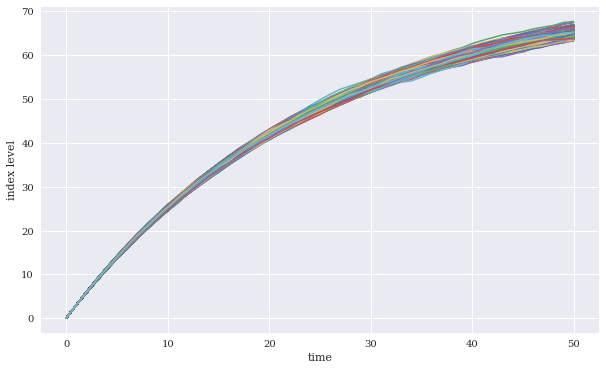

In [52]:

# This plot show the first 10 simulated paths

plt.figure(figsize=(10,6))
plt.plot(x1[:, :-10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

In [58]:
"""
Stochastic Volatility and the leverage effect are stylized facts (empirical) founds in a number of markets.
Another important stylized fact is the existence of jumps in asset prices and volatility.

Given the discretization scheme, consider the numerical parameterization:
"""

S0 = 100
r = 0.05
sigma = 0.2
lamb = 0.75 # The jump intensity
mu = -0.6 # The mean jump size
delta = 0.25 # The jump valatility
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1) # The drift correction

In [59]:
T = 1.0
m = 50
I = 10000
dt = T / M

Text(0, 0.5, 'frequency')

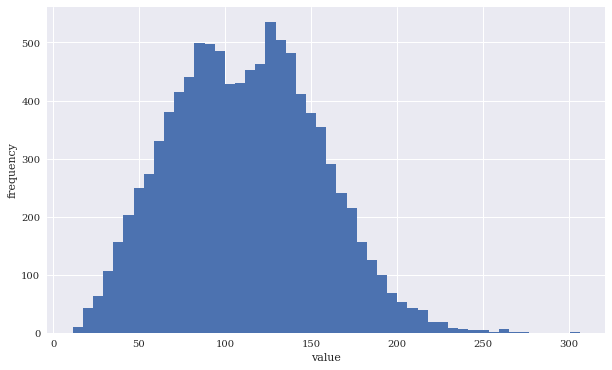

In [65]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I)) # Standarard normally distributed random numbers
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I)) # Poisson distributed random numbers
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn1[t] + (np.exp(mu + delta * sn2[t]) - 1) * poi[t]))
    # ^ Simulation based on the exact Eular scheme.                   
    S[t] = np.maximum(S[t], 0)
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

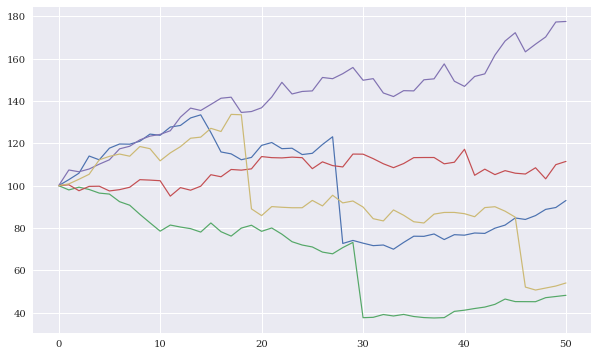

In [67]:
"""
Negative jumps can also be spotted in the first 10 simulated index level paths
"""

plt.figure(figsize=(10, 6))
plt.plot(S[:, :5], lw=1.2)

In [71]:
def gen_sn(M, I, anti_paths=True, no_match=True):
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if no_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

In [72]:
"""
Valuation 
One of the most important application of Monte Carlo sim
is the valuation of continget claims (options, derivaties, hybrid instruments)
In a risk neutral world, the value of a contigent claim is the discouted expected payoff under the risk neutral measure(martingale)
This the probability measure that makes all risk factors (stock, indeces, etc) drift at the riskless short rate.
Making the discounted processes martingale.

# American Options

The valuation of American options, an optimal stopping problem has to be solved to come up with a faair value of the option.

The funtion gbm_mcs_amer() implements the LSM algo for both American call and put options

"""
def gbm_mcs_amer(K, option='call'):
    ''' Valutaion of USA option in Black - Scholes - Merton
    by Monte Carlo simulation by LSM algo
    
    Parameters
    ========
    K: float 
        (positive) strike of the option
    option: string
        type of the option to be valued ('call', 'put')
        
    Returns
    ========
    C0 = float
        estimated present value of American call option
    '''

    dt = T / M 
    df = math.exp(-r * dt)
    # Simulation index level 
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
                                + sigma * math.sqrt(dt) * sn[t])
    # case based calculation of pay of
    
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)
    # LSM algo
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
        # MCS estimator
        C0 = df * np.mean(V[1])
        return C0

In [73]:
gbm_mcs_amer(110, option='call')

8.384908502457804e-05

In [74]:
gbm_mcs_amer(110, option='put')

9.891394924268484

In [ ]:
# Risk Measure